In [ ]:
from jax.random import key, normal
import ppptm as gptm
import jax.numpy as jnp
import plotnine as p9


nobs = 23


In [15]:
locs = gptm.unit_grid_vars()
y = normal(key(123), (23, locs.locs.nloc))
model = gptm.Model.new_HG(y, locs)
samp = 0.1 * model.coef.latent_var.sample((1,), seed=key(1))["coef_latent"].squeeze()

In [16]:
model.coef.latent_var.value = samp

val = model.h(y)
vali = model.hi(val)

In [19]:
df = gptm.long_df_multiple(locs.ordered.value, y=y, val=val, vali=vali)
df

,loc,lon,lat,obs,y,val,vali
0,0,0.444444,0.444444,0,1.635947,0.096169,1.635955
1,1,1.000000,1.000000,0,0.840809,2.055143,0.840814
2,2,0.000000,1.000000,0,0.022124,0.113982,0.022118
3,3,1.000000,0.000000,0,-0.529277,1.923536,-0.529277
4,4,0.000000,0.000000,0,-0.686645,-3.394219,-0.686639
...,...,...,...,...,...,...,...
2295,95,1.000000,0.222222,22,0.268830,1.006080,0.268829
2296,96,1.000000,0.444444,22,0.091275,-0.641772,0.091277
2297,97,1.000000,0.555556,22,-0.190288,1.016498,-0.190288
2298,98,1.000000,0.666667,22,0.081230,0.572491,0.081217


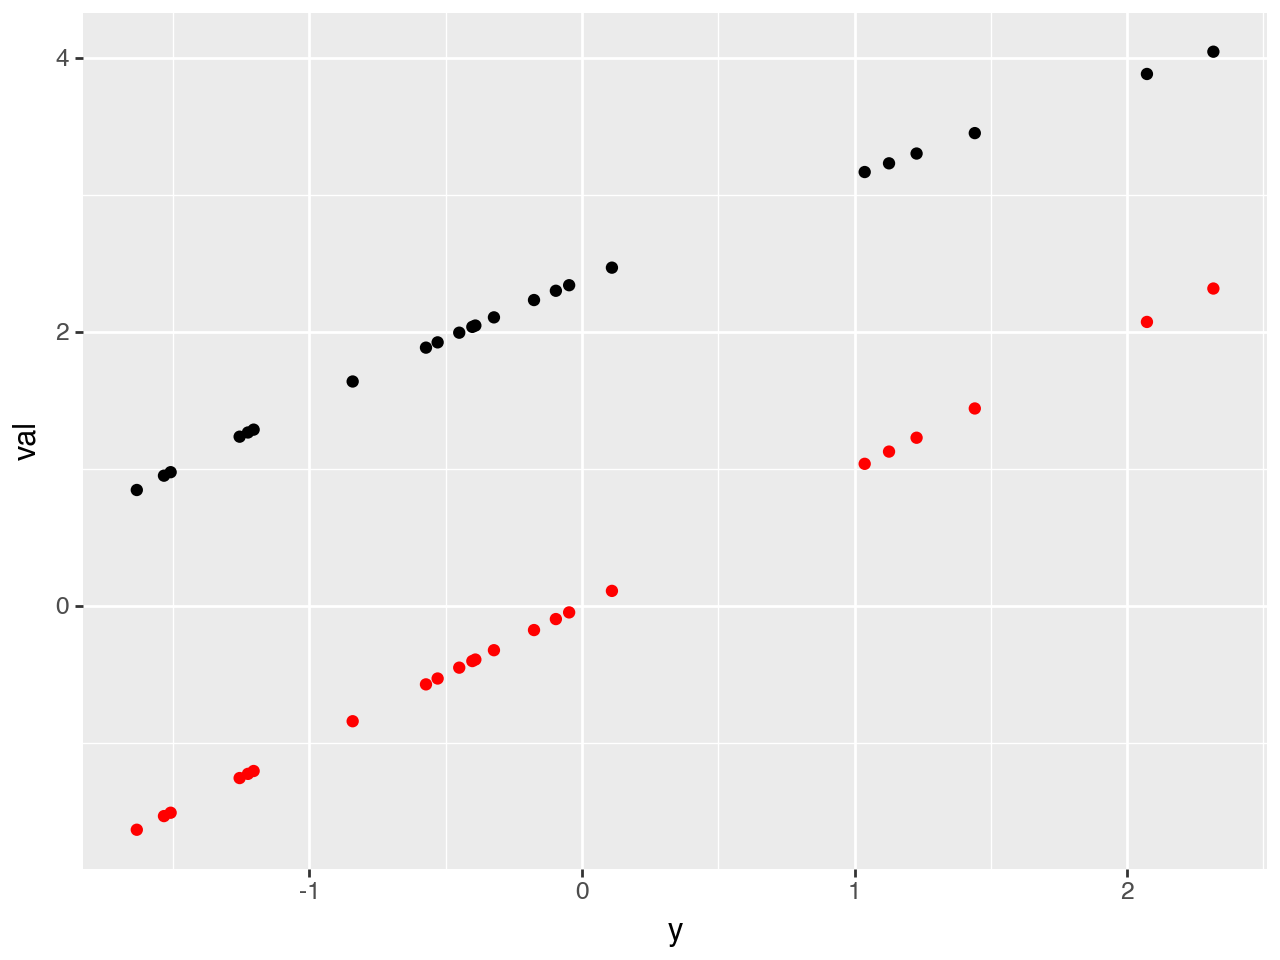

In [20]:
(
    p9.ggplot(df.query("loc == 3"))
    + p9.geom_point(p9.aes("y", "val"))
    + p9.geom_point(p9.aes("y", "vali"), color="red")
)

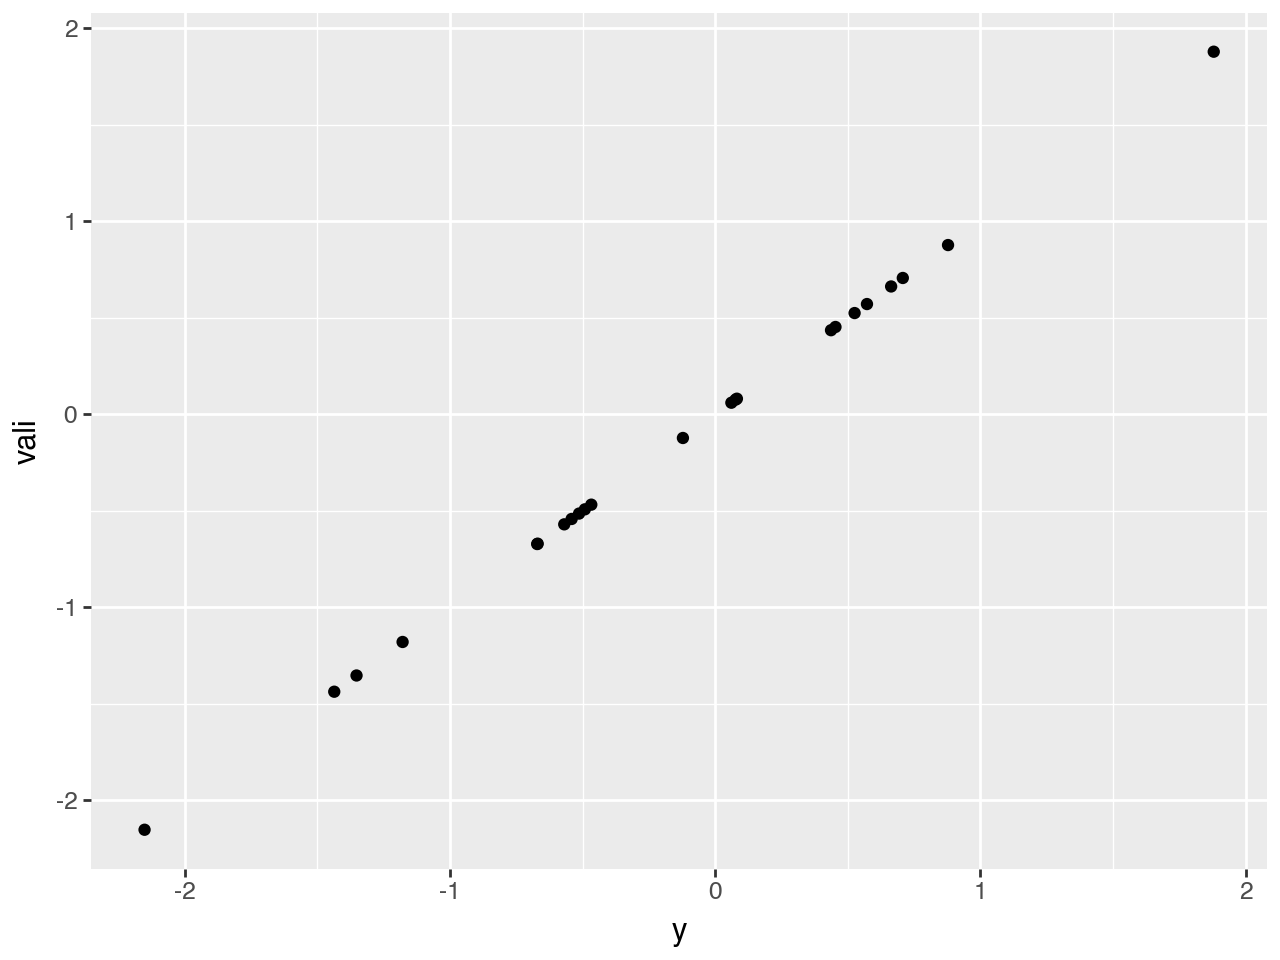

In [21]:
(p9.ggplot(df.query("loc == 85")) + p9.geom_point(p9.aes("y", "vali")))

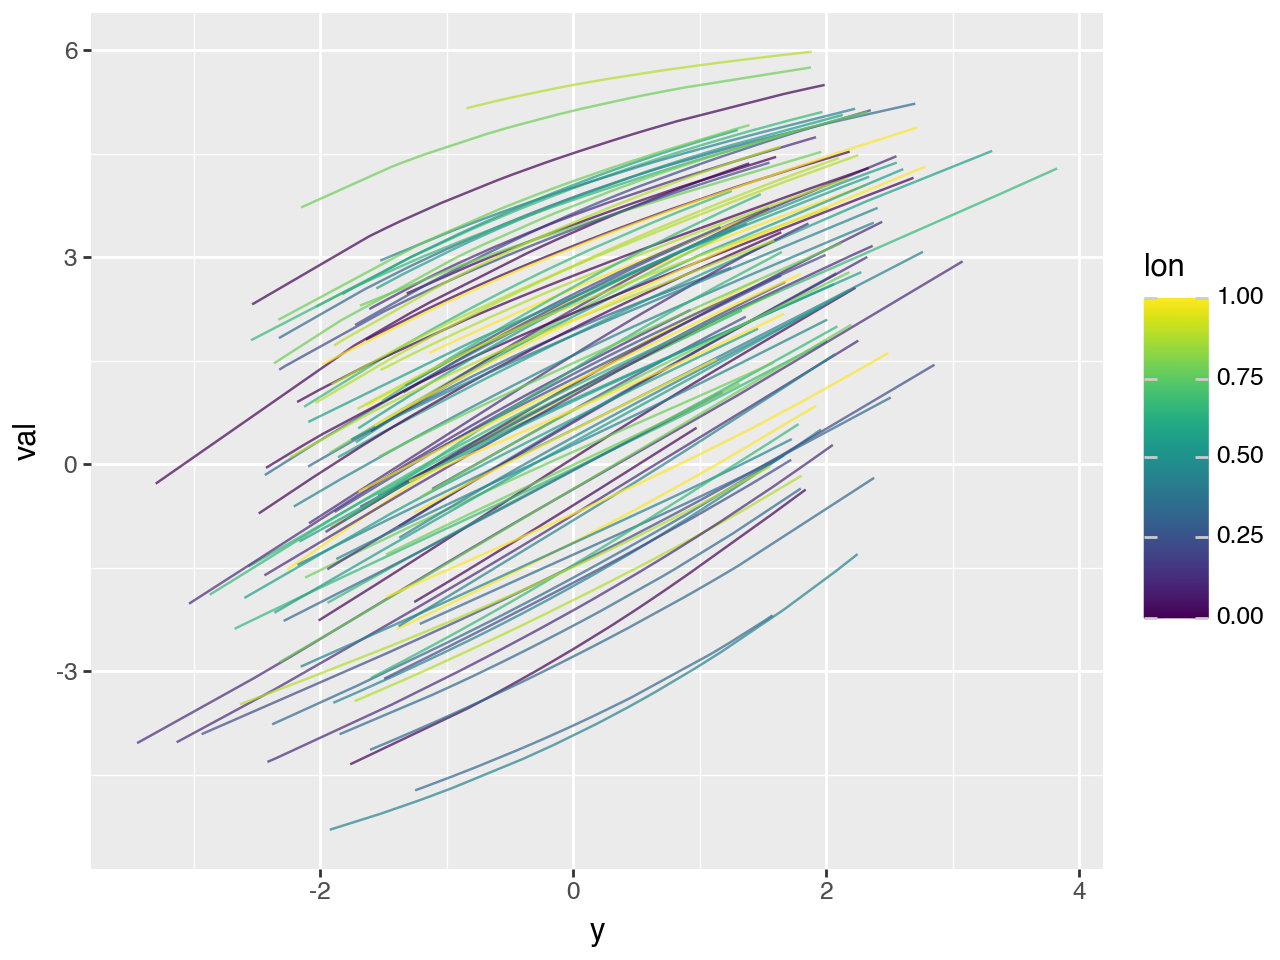

In [30]:
(p9.ggplot(df) + p9.geom_line(p9.aes("y", "val", group="loc", color="lon"), alpha = 0.7))

In [22]:
model.coef.value.shape

(100, 40)

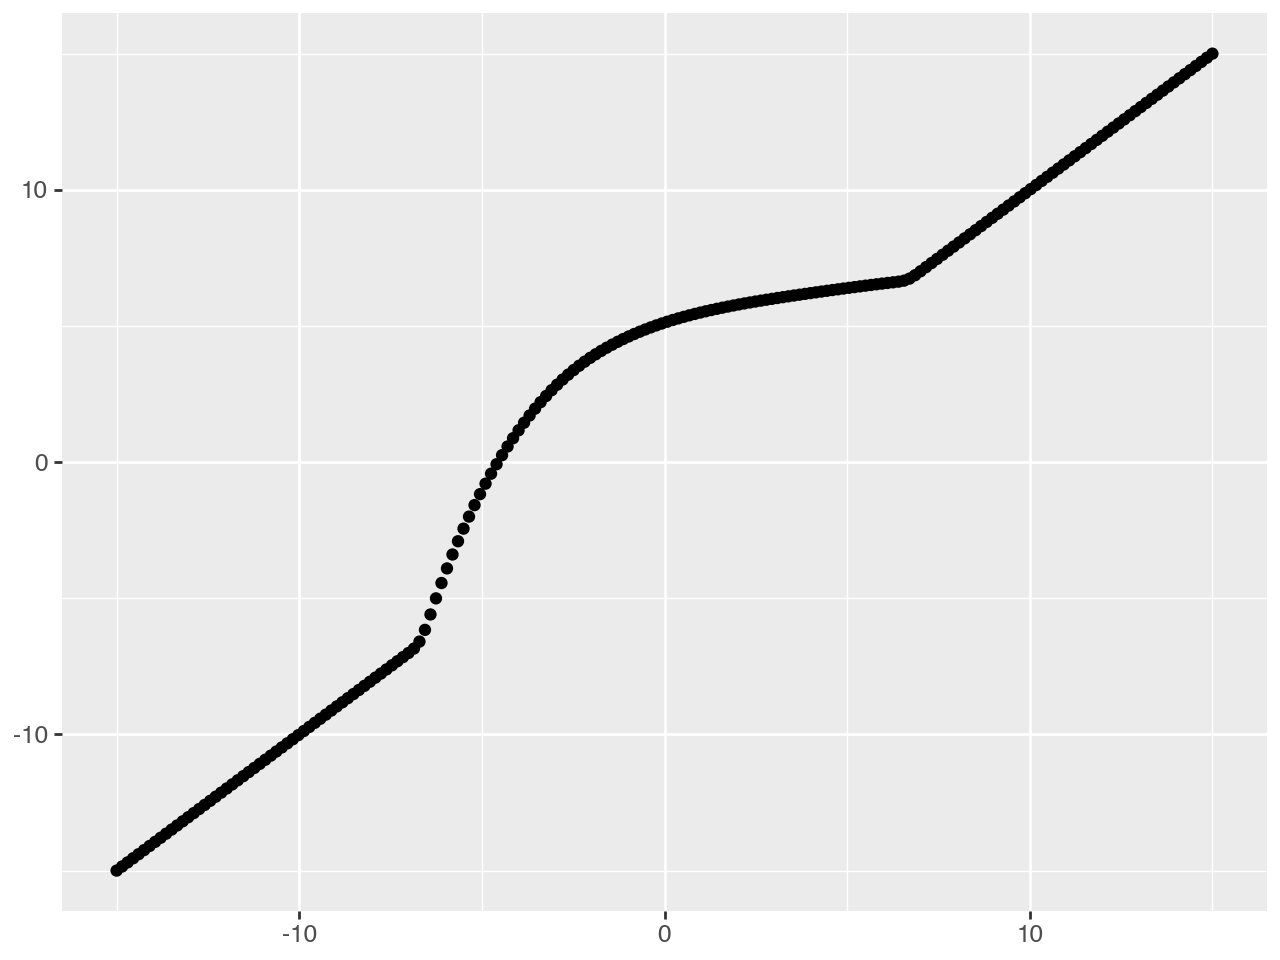

In [23]:
grid = jnp.linspace(-15.0, 15.0, 200)
hx = model.dist_node.bspline.dot_and_deriv(grid, model.coef.value[85, :])[0]
p9.ggplot() + p9.geom_point(p9.aes(grid, hx))

In [24]:
df.query("loc == 85")

,loc,lon,lat,obs,y,val,vali
85,85,0.777778,0.666667,0,1.879758,5.750517,1.879756
185,85,0.777778,0.666667,1,0.572198,5.352154,0.572193
285,85,0.777778,0.666667,2,-0.569278,4.848666,-0.569271
385,85,0.777778,0.666667,3,-0.671297,4.793756,-0.671300
485,85,0.777778,0.666667,4,0.707315,5.400450,0.707309
585,85,0.777778,0.666667,5,-0.467257,4.901658,-0.467253
685,85,0.777778,0.666667,6,0.877874,5.458611,0.877871
785,85,0.777778,0.666667,7,-0.121799,5.068621,-0.121799
885,85,0.777778,0.666667,8,-0.491486,4.889237,-0.491484
985,85,0.777778,0.666667,9,-0.541393,4.863333,-0.541388


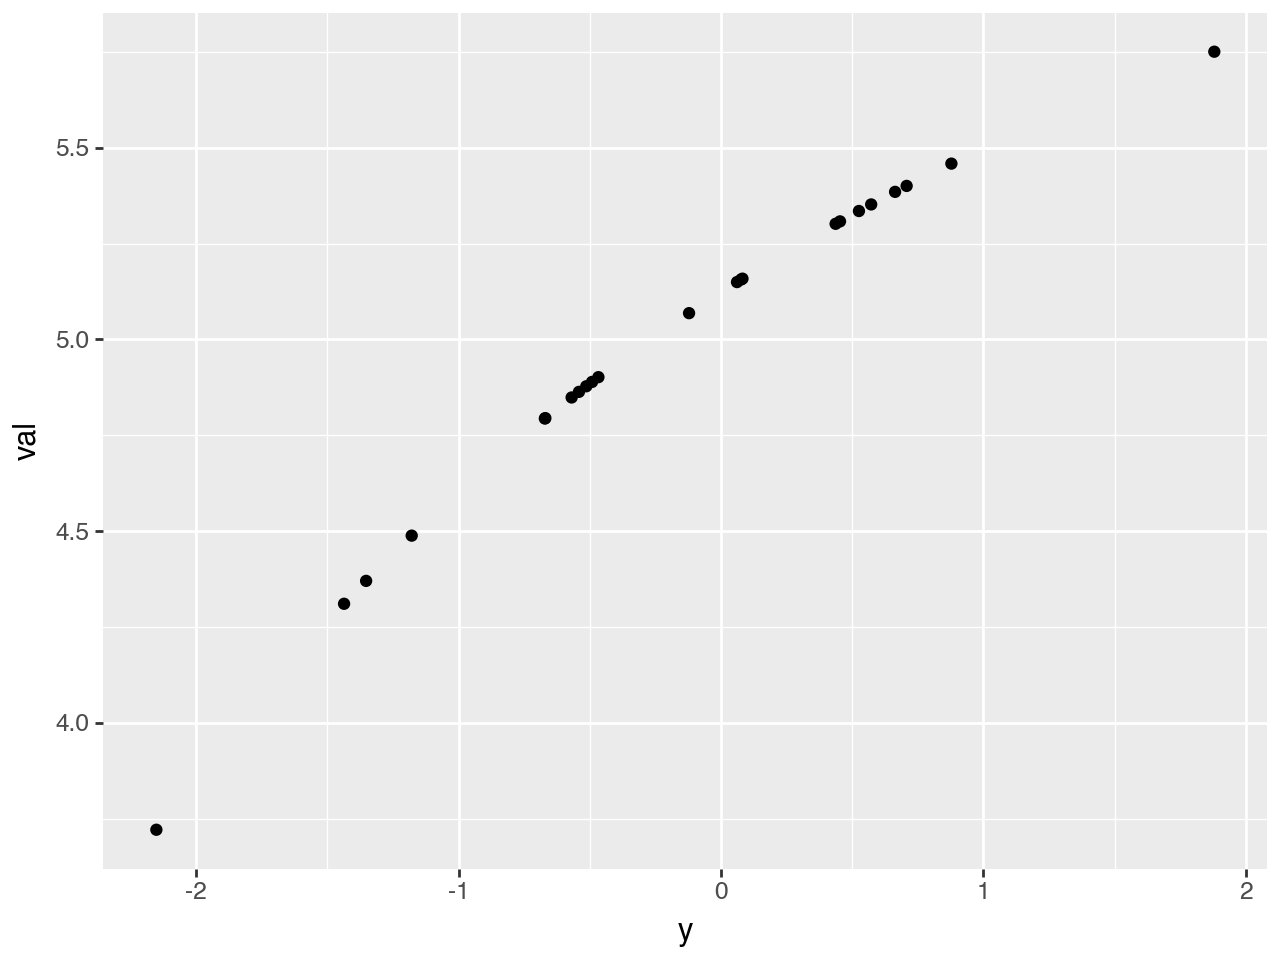

In [25]:
(p9.ggplot(df.query("loc == 85")) + p9.geom_point(p9.aes("y", "val")))